In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('log2.csv')

In [5]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [7]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [8]:
df['target'] = df.Action

In [9]:
df = df.drop(columns=['Action'])

In [10]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,target
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [11]:
df['target'].value_counts()

target
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

In [12]:
X=df.iloc[:,0:-1]
y=df['target']

In [13]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.51325629, -0.56993668,  1.60688158, ..., -0.11847399,
        -0.01255093, -0.02719655],
       [ 0.45006636, -0.38927922,  1.68293804, ..., -0.16145495,
        -0.0097549 , -0.02359832],
       [-2.78658198,  2.15227224,  1.09155473, ...,  3.74650686,
        -0.01255093, -0.02719655],
       ...,
       [ 0.35914891, -0.54870834, -0.87767476, ..., -0.21766084,
        -0.01255093, -0.02764633],
       [ 0.35908336, -0.54870834, -0.87767476, ..., -0.21766084,
        -0.01255093, -0.02764633],
       [ 0.35888671, -0.54870834, -0.87767476, ..., -0.21766084,
        -0.01255093, -0.02764633]])

In [14]:
samples=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=i)
  samples.append((X_train, X_test, y_train, y_test))

In [15]:
kernels=['linear','poly','rbf','sigmoid']
ans= pd.DataFrame(columns=['Sample','Best Accuracy','Best Kernel','Best Nu','Best Epsilon'])

In [16]:
def fitness(kernel, C, gamma):
  svm=SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred=svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [17]:
for i in range(len(samples)):
  best_accuracy=0
  best_C= 0
  best_gamma=0
  for kernel in kernels:
    X_train, X_test, y_train, y_test =samples[i]
    C=np.random.uniform(0,10)
    gamma=np.random.uniform(0,10)
    score=fitness(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy=round(score,2)
      best_C=round(C,2)
      best_gamma=round(gamma,2)
      best_kernel=kernel
  ans.loc[i]=[i+1,best_accuracy,best_kernel,best_C,best_gamma]

In [18]:
ans

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.85,poly,9.75,0.96
1,2,0.82,linear,6.55,4.30
2,3,0.58,sigmoid,6.05,4.97
3,4,0.67,poly,4.74,5.89
4,5,0.68,linear,9.43,9.45
5,6,0.66,linear,8.88,7.00
6,7,0.65,poly,8.94,0.96
7,8,0.74,poly,9.67,8.51
8,9,0.63,rbf,5.54,3.24
9,10,0.67,rbf,3.28,3.91


Convergence Graph

In [19]:
X_train, X_test, y_train, y_test = samples[ans['Best Accuracy'].idxmax()]

In [20]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=ans['Best Kernel'].iloc[ans['Best Accuracy'].idxmax()], 
                                                        C=ans['Best Nu'].iloc[ans['Best Accuracy'].idxmax()],
                                                        gamma=ans['Best Epsilon'].iloc[ans['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [21]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

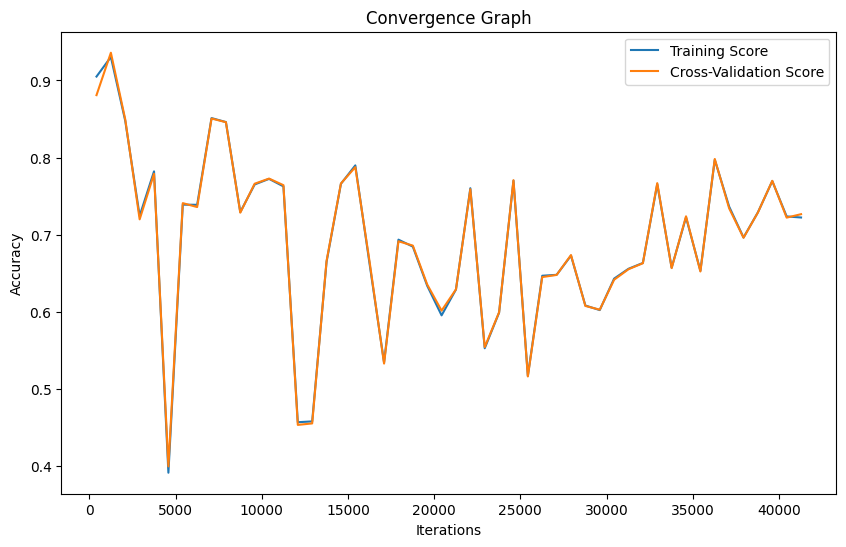

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()